# HW 1

**Upload two files** to Gradescope: 
* `HW1.ipynb` (run all cells to make sure that outputs are visible, especially plots)
* `HW1.py` (which will be autograded)

___

In [3]:
import math
import matplotlib.pyplot as plt

### Fractions

Create a **`Fraction`** class to represent fractions as objects. The **`__init__`** method should do the following:
* Store the numerator and denominator as separate attributes. Assume that they are `int`s.
* Set the default value for the denominator to be 1.
* If the fraction is negative, set the numerator to be negative. 
* Generate an error if the denominator is 0 by calling `raise ZeroDivisionError('division by zero')`.
* The fraction should be stored in simplest form. Use the `math.gcd()` function.

Include the following methods. For arithmetic operations, return a `Fraction` in simplest form.
* **`__repr()__`**: returns a string representation of a `Fraction` in the form `numerator/denominator` with no spaces. 
* **`__eq__()`**: returns `True` if two `Fraction`s are equal
* **`__add__()`**: adds two `Fraction`s
* **`__sub__()`**: subtracts two `Fraction`s
* **`__mul__()`**: multiplies two `Fraction`s
* **`__truediv__()`**: divides two `Fraction`s (raise an error if the second fraction is zero)
* **`plot()`**: uses a row of colored rectangles to illustrate a `Fraction` with value between 0 and 1. If the `Fraction` value is greater than 1, display only the remainder part. Use the `.plot()` or `.fill()` command.

Examples:<br>
`Fraction(3, 5)` returns a `Fraction` and displays the string `3/5`.<br>
`Fraction(6, -10)` returns a `Fraction` and displays the string `-3/5`.<br>
`Fraction(-3, 5) == Fraction(6, -10)` returns `True`.<br>
`Fraction(3, 5) + Fraction(7, 5)` returns a `Fraction` and displays the string `2/1`.<br>
`Fraction(2, 5) - Fraction(3, 5)` returns a `Fraction` and displays the string `-1/5`.<br>
`Fraction(3, 5) * Fraction(5, 6)` returns a `Fraction` and displays the string `1/2`.<br>
`Fraction(3, 5) / Fraction(5, 6)` returns a `Fraction` and displays the string `18/25`.<br>
`Fraction(17, 5).plot()` displays a row of 5 rectangles with 2 of the rectangles shaded, representing the value 2/5.

<img src="http://www.coloradomath.org/python/fracplot.jpg" width="259" height="69" />

In [4]:
class Fraction:
    def __init__(self, numerator, denominator = 1):
        if denominator == 0:
            raise ZeroDivisionError('division by zero')
        if denominator < 0:
            numerator= -numerator
            denominator = -denominator
        self.numerator = int(numerator/math.gcd(numerator,denominator))
        self.denominator = int(denominator/math.gcd(numerator,denominator))
        
    def __repr__(self):
        return f'{self.numerator}/{self.denominator}'

    def __eq__(self, other):
        if self.numerator == other.numerator and self.denominator == other.denominator:
            return True
        else:
            return False

    def __add__(self, other):
        new_numerator = self.numerator*other.denominator
        new_denominator = self.denominator * other.denominator
        new_other_numerator = self.denominator * other.numerator
        new_other_denominator = self.denominator * other.denominator
        #print(f'{self} + {other} = {new_numerator}/{new_denominator} + {new_other_numerator}/{new_other_denominator}')
        return Fraction(new_numerator+new_other_numerator, new_denominator)   

    def __sub__(self, other):
        new_numerator = self.numerator*other.denominator
        new_denominator = self.denominator * other.denominator
        new_other_numerator = self.denominator * other.numerator
        new_other_denominator = self.denominator * other.denominator
        return Fraction(new_numerator-new_other_numerator, new_denominator) 

    def __mul__(self, other):
        return Fraction(self.numerator * other.numerator, self.denominator * other.denominator)

    def __truediv__(self,other):
        return Fraction(self.numerator * other.denominator, self.denominator * other.numerator)
    
    def plot(self):
        plt.axis('equal')
        plt.axis('off')
        val = self.numerator/self.denominator
        if val > 1:
            self.numerator %= self.denominator
        for n in range(self.numerator):
            fill_x = [n,n,n+1,n+1]
            fill_y = [0,1,1,0]
            plt.fill(fill_x, fill_y, color = 'blue')
        for m in range(self.denominator):
            box_x= [m,m,m+1,m+1,m]
            box_y= [0,1,1,0,0]
            plt.plot(box_x,box_y, color = 'black')
    
        


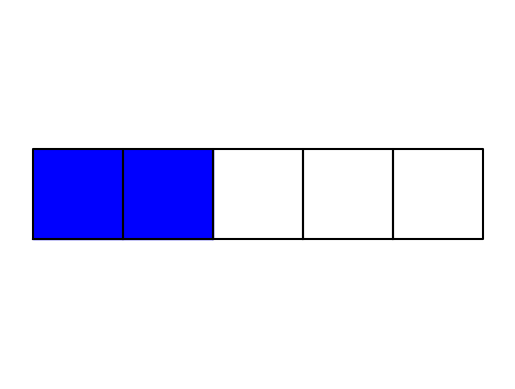

In [5]:
Fraction(17,5).plot()

In [6]:
Fraction(2,5) - Fraction(3,5)

-1/5

In [7]:
Fraction(3,5)*Fraction(5,6)

1/2

In [8]:
Fraction(3,5)/Fraction(5,6)

18/25

In [9]:
Fraction(1,2)

1/2

In [10]:
Fraction(4,15) == Fraction(20,75)

True

### Unit Fractions

A *unit fraction* has a numerator of 1. Create a **UnitFraction** subclass that inherits all of the properties of the `Fraction` class.

Example:<br>
`UnitFraction(2) * UnitFraction(3)` returns a Fraction object and displays the string `1/6`.<br>
`UnitFraction(2) == Fraction(3, 6)` returns `True`.

In [11]:
class UnitFraction(Fraction):
    def __init__(self, denominator):
        self.numerator = 1
        self.denominator = denominator

In [12]:
UnitFraction(2) * UnitFraction(3), UnitFraction(2) == Fraction(3,6)

(1/6, True)

### Egyptian Fractions
An *Egyptian fraction* is a representation of a fraction as a sum of distinct unit fractions, such as $\frac 56 = \frac 12 + \frac 13$. Fibonacci's *greedy algorithm* can find an Egyptian fraction representation for any fraction $\frac ab$ by repeatedly choosing the largest possible unit fraction. For example, applying the algorithm to the fraction $\frac {7}{15}$ produces

$$\frac{7}{15} = \frac 13 + \frac{2}{15} = \frac 13 + \frac 18 + \frac{1}{120}.$$

Note that the greedy algorithm does not always find the shortest representation. For example, $\frac{4}{17}$ equals $\frac 15 + \frac{1}{30} + \frac{1}{510}$ with 3 unit fractions, however the greedy algorithm produces 4.

Write a non-recursive function **egyptian(frac)** that returns a list of the `UnitFraction`s that sum to a given positive `Fraction`. If the fraction is greater than 1, the first element of the list should be an integer `Fraction`. (Can you figure out how to find the largest unit fraction at each step?) 

Example:<br>
`egyptian(Fraction(7, 15))` returns a list of 3 `UnitFraction`s and displays `[1/3, 1/8, 1/120]`.<br>
`egyptian(Fraction(17, 6))` returns a list containing a `Fraction` and two `UnitFraction`s, displaying `[2/1, 1/2, 1/3]`.<br>
`egyptian(Fraction(3))` returns a list containing a single `Fraction`, displaying `[3/1]`.

In [13]:
def egyptian(frac):
    loop_frac = frac
    frac_lst=[]
    if loop_frac.numerator / loop_frac.denominator >= 1:
        x = math.floor(loop_frac.numerator / loop_frac.denominator)
        frac_lst.append(Fraction(x,1))
        loop_frac -= Fraction(x,1)
    while loop_frac.numerator != 0:
        x = math.ceil(loop_frac.denominator/loop_frac.numerator)
        frac_lst.append(UnitFraction(x))
        loop_frac = Fraction(x * loop_frac.numerator - loop_frac.denominator, x * loop_frac.denominator)
    return frac_lst


        

In [14]:
egyptian(Fraction(7,15)), egyptian(Fraction(17,6)), egyptian(Fraction(3)), egyptian(Fraction(4,17))

([1/3, 1/8, 1/120], [2/1, 1/2, 1/3], [3/1], [1/5, 1/29, 1/1233, 1/3039345])

Now write a recursive version called **egyptian_rec(frac)**.

In [15]:
def egyptian_rec(frac):
    if frac.denominator == 1:
        return [frac]
    if frac.numerator / frac.denominator >= 1:
        if Fraction((math.ceil(frac.denominator/frac.numerator)) * frac.numerator - frac.denominator, (math.ceil(frac.denominator/frac.numerator)) * frac.denominator) == 0:
            return [UnitFraction(math.ceil(frac.denominator/frac.numerator))]
        else:
            return [Fraction(math.floor(frac.numerator / frac.denominator),1)] + egyptian_rec(Fraction(frac.numerator - (math.floor(frac.numerator / frac.denominator)*frac.denominator), frac.denominator))

    else:
        if Fraction((math.ceil(frac.denominator/frac.numerator)) * frac.numerator - frac.denominator, (math.ceil(frac.denominator/frac.numerator)) * frac.denominator) == 0:
            return [UnitFraction(math.ceil(frac.denominator/frac.numerator))]
            #return frac_lst
        else:
            return [UnitFraction(math.ceil(frac.denominator/frac.numerator))] + egyptian_rec(Fraction((math.ceil(frac.denominator/frac.numerator)) * frac.numerator - frac.denominator, (math.ceil(frac.denominator/frac.numerator)) * frac.denominator))
    
    

In [16]:
egyptian_rec(Fraction(7,15)),egyptian_rec(Fraction(17,6)), egyptian_rec(Fraction(3))

([1/3, 1/8, 1/120], [2/1, 1/2, 1/3], [3/1])

In [43]:
fracs3 = [Fraction(2,4), Fraction(1,4), Fraction(3,4)]

In [46]:
def arith_sum(fracs3):
    num_sum = 0
    for n in fracs3:
        print(n)
        print(num_sum)
        num_sum += n.numerator
        print(num_sum)
    print(num_sum)
    if num_sum % 3 == 0:
        return True
    else:
        return False


In [47]:
arith_sum(fracs3)

1/2
0
1
1/4
1
2
3/4
2
5
5


False

In [33]:
2+1+3

6

In [34]:
6%3

0